# AdaBoost Implementation

Adaptive Boosting with decision stumps.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)
np.random.seed(42)

---
## AdaBoost Class

In [2]:
class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []
    
    def fit(self, X, y):
        m = X.shape[0]
        
        # Initialize weights
        weights = np.ones(m) / m
        
        # Convert labels to {-1, 1}
        y_coded = np.where(y == 0, -1, 1)
        
        for _ in range(self.n_estimators):
            # Train weak learner (decision stump)
            stump = DecisionTreeClassifier(max_depth=1, random_state=42)
            stump.fit(X, y, sample_weight=weights)
            predictions = stump.predict(X)
            pred_coded = np.where(predictions == 0, -1, 1)
            
            # Calculate error
            incorrect = pred_coded != y_coded
            error = np.sum(weights[incorrect])
            
            # Calculate alpha (model weight)
            epsilon = 1e-10  # Avoid division by zero
            alpha = 0.5 * np.log((1 - error + epsilon) / (error + epsilon))
            
            # Update sample weights
            weights *= np.exp(-alpha * y_coded * pred_coded)
            weights /= np.sum(weights)  # Normalize
            
            # Save model and alpha
            self.models.append(stump)
            self.alphas.append(alpha)
        
        return self
    
    def predict(self, X):
        # Weighted sum of predictions
        predictions = np.zeros(X.shape[0])
        
        for alpha, model in zip(self.alphas, self.models):
            pred = model.predict(X)
            pred_coded = np.where(pred == 0, -1, 1)
            predictions += alpha * pred_coded
        
        # Return class with sign
        return np.where(predictions >= 0, 1, 0)

print('AdaBoost class ready')

AdaBoost class ready


---
## Test on Binary Classification

In [3]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                          n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train: {X_train.shape}, Test: {X_test.shape}')

Train: (400, 2), Test: (100, 2)


In [4]:
# Our AdaBoost
ada = AdaBoost(n_estimators=50)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('='*50)
print('OUR ADABOOST')
print('='*50)
print(f'Estimators: {ada.n_estimators}')
print(f'Accuracy: {acc*100:.2f}%')

OUR ADABOOST
Estimators: 50
Accuracy: 87.00%


In [5]:
# sklearn AdaBoost
sklearn_ada = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')
sklearn_ada.fit(X_train, y_train)
y_pred_sk = sklearn_ada.predict(X_test)

acc_sk = accuracy_score(y_test, y_pred_sk)
print('='*50)
print('SKLEARN ADABOOST')
print('='*50)
print(f'Accuracy: {acc_sk*100:.2f}%')
print(f'\nDifference: {abs(acc - acc_sk)*100:.2f}%')

SKLEARN ADABOOST
Accuracy: 87.00%

Difference: 0.00%


C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


---
## Visualize Boosting Progress

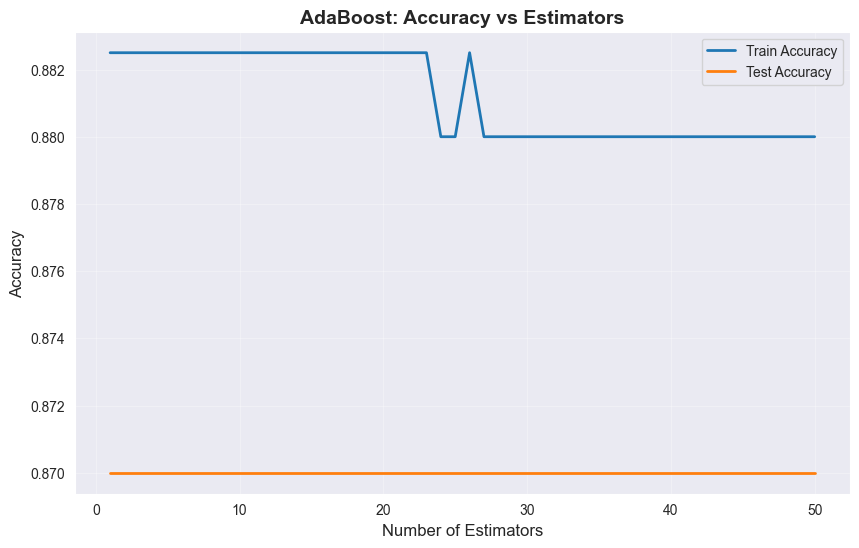

Best test accuracy: 87.00% at 1 estimators


In [6]:
# Track accuracy as estimators increase
n_range = range(1, 51)
train_scores = []
test_scores = []

for n in n_range:
    ada_temp = AdaBoost(n_estimators=n)
    ada_temp.fit(X_train, y_train)
    
    train_scores.append(accuracy_score(y_train, ada_temp.predict(X_train)))
    test_scores.append(accuracy_score(y_test, ada_temp.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_range, train_scores, label='Train Accuracy', linewidth=2)
plt.plot(n_range, test_scores, label='Test Accuracy', linewidth=2)
plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('AdaBoost: Accuracy vs Estimators', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'Best test accuracy: {max(test_scores)*100:.2f}% at {np.argmax(test_scores)+1} estimators')

---
## Summary

**Key Points:**
- AdaBoost combines weak learners sequentially
- Each learner focuses on previously misclassified samples
- Weighted voting creates strong classifier
- Decision stumps often work best

**Key Point:** "AdaBoost adaptively weights training samples, forcing subsequent weak learners to focus on hard examples. The ensemble of weighted weak learners creates a powerful classifier."